In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/workspaces/Powerbox/ETL/Raw_data/Powerbox/Clean_data/cleaned_solar_data.csv')

# Convert timestamp to datetime and sort
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce', dayfirst=True)
data = data.sort_values('Timestamp')

#print the head of the data
data.head()

,Timestamp,System ON,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),Inverter Efficiency (%),System Load (kW),System Fault Alerts,Voltage (V),...,Battery Full Flag,Customer Profile,Solar Panels Type,Solar Panels Configuration,Depth of Discharge,Battery Capacity (Wh),Inverter Capacity (kW),Battery Technology,Latitude,Longitude
0,2024-05-09 01:15:00,False,21.780895,0.0,0.0,0.294086,90.0,0.0,False,220.0,...,False,Residential,MonoCrystalline,1s2p,0.1,1000.0,1.0,Lithium - Ion,10.525053,7.417253
1,2024-05-09 01:30:00,False,21.000000,0.0,0.0,0.294086,90.0,0.0,False,220.0,...,False,Residential,MonoCrystalline,1s2p,0.1,1000.0,1.0,Lithium - Ion,10.525053,7.417254
2,2024-05-09 01:45:00,False,21.884164,0.0,0.0,0.294086,90.0,0.0,False,220.0,...,False,Residential,MonoCrystalline,1s2p,0.1,1000.0,1.0,Lithium - Ion,10.525053,7.417255
3,2024-05-09 02:00:00,False,21.000000,0.0,0.0,0.294086,90.0,0.0,False,220.0,...,False,Residential,MonoCrystalline,1s2p,0.1,1000.0,1.0,Lithium - Ion,10.525053,7.417256
4,2024-05-09 02:15:00,False,21.000000,0.0,0.0,0.294086,90.0,0.0,False,220.0,...,False,Residential,MonoCrystalline,1s2p,0.1,1000.0,1.0,Lithium - Ion,10.525053,7.417257


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Timestamp                          575 non-null    datetime64[ns]
 1   System ON                          1059 non-null   bool          
 2   Temperature (°C)                   1059 non-null   float64       
 3   Solar Panels Energy Output (W)     1059 non-null   float64       
 4   Power Consumption (kW)             1059 non-null   float64       
 5   Energy Stored in Batteries (kWh)   1059 non-null   float64       
 6   Inverter Efficiency (%)            1059 non-null   float64       
 7   System Load (kW)                   1059 non-null   float64       
 8   System Fault Alerts                1059 non-null   bool          
 9   Voltage (V)                        1059 non-null   float64       
 10  Current (A)                        1

In [65]:
# Apply backward fill to fill missing values at the start
data['Timestamp'] = data['Timestamp'].fillna(method='bfill')

# Apply forward fill to fill missing values at the end
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

/tmp/ipykernel_6734/2864562677.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Timestamp'] = data['Timestamp'].fillna(method='bfill')
/tmp/ipykernel_6734/2864562677.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Timestamp'] = data['Timestamp'].fillna(method='ffill')


In [55]:
data.isna().sum()

Timestamp                            0
System ON                            0
Temperature (°C)                     0
Solar Panels Energy Output (W)       0
Power Consumption (kW)               0
Energy Stored in Batteries (kWh)     0
Inverter Efficiency (%)              0
System Load (kW)                     0
System Fault Alerts                  0
Voltage (V)                          0
Current (A)                          0
Power Factor                         0
Dust and Dirt Accumulation (g/m²)    0
Battery Low Flag                     0
Battery Full Flag                    0
Customer Profile                     0
Solar Panels Type                    0
Solar Panels Configuration           0
Depth of Discharge                   0
Battery Capacity (Wh)                0
Inverter Capacity (kW)               0
Battery Technology                   0
Latitude                             0
Longitude                            0
dtype: int64

In [66]:
#carry out feature enrichment
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Weekday'] = data['Timestamp'].dt.weekday


In [57]:
#check data info/dta types
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,1059,2024-10-13 04:17:14.277620480,2024-05-09 01:15:00,2024-08-09 18:52:30,2024-12-09 06:30:00,2024-12-09 23:45:00,2024-12-09 23:45:00,NaN
Temperature (°C),1059.0,25.237596,21.0,21.808438,23.649703,27.734323,36.867293,4.280521
Solar Panels Energy Output (W),1059.0,50.456576,0.0,0.0,0.0,77.645714,300.0,88.530968
Power Consumption (kW),1059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Energy Stored in Batteries (kWh),1059.0,0.241823,0.2,0.213732,0.245905,0.26335,0.32909,0.030498
Inverter Efficiency (%),1059.0,90.0,90.0,90.0,90.0,90.0,90.0,0.0
System Load (kW),1059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Voltage (V),1059.0,220.0,220.0,220.0,220.0,220.0,220.0,0.0
Current (A),1059.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Power Factor,1059.0,0.9,0.9,0.9,0.9,0.9,0.9,0.0


In [58]:
#check the non-numeric 
data.describe(include='object').T

,count,unique,top,freq
Customer Profile,1059,1,Residential,1059
Solar Panels Type,1059,1,MonoCrystalline,1059
Solar Panels Configuration,1059,1,1s2p,1059
Battery Technology,1059,1,Lithium - Ion,1059


In [61]:
def correlation_analysis(df):
    # Select only numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate correlation matrix for numeric columns
    correlation_matrix = numeric_df.corr()

    # Optionally, visualize the correlation matrix using heatmap
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Create a heatmap to visualize the correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    return correlation_matrix

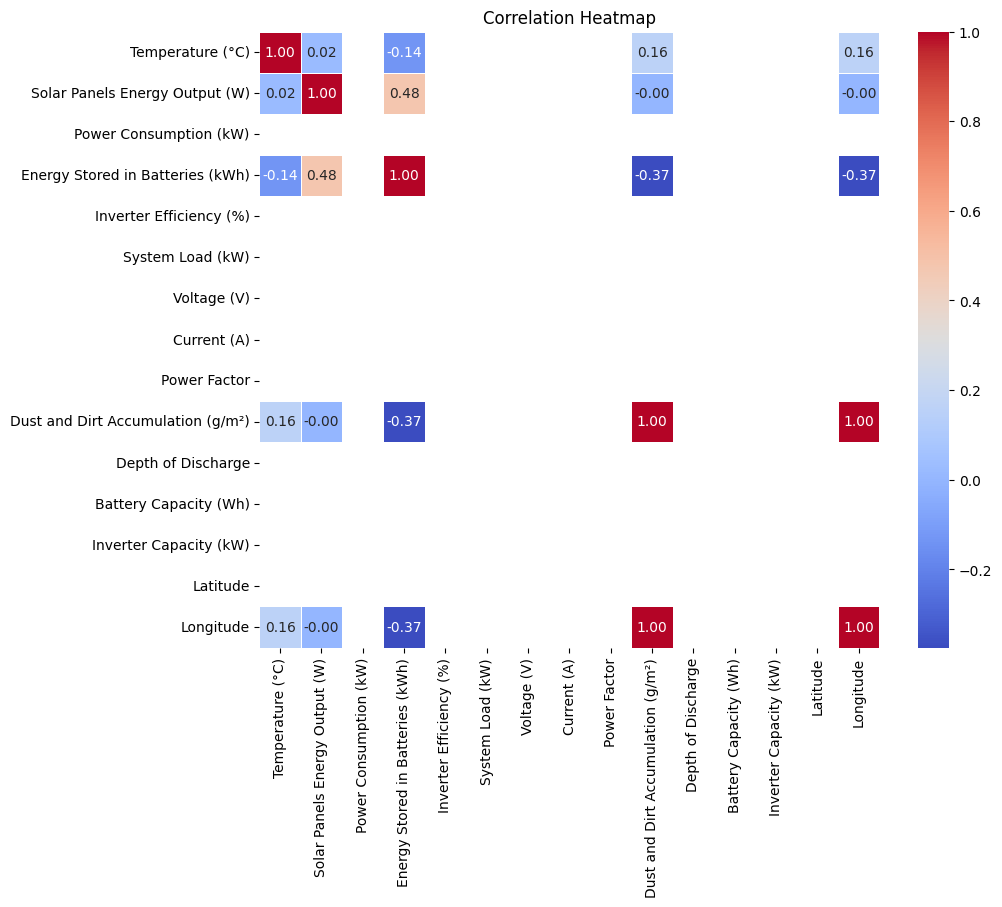

,Temperature (°C),Solar Panels Energy Output (W),Power Consumption (kW),Energy Stored in Batteries (kWh),Inverter Efficiency (%),System Load (kW),Voltage (V),Current (A),Power Factor,Dust and Dirt Accumulation (g/m²),Depth of Discharge,Battery Capacity (Wh),Inverter Capacity (kW),Latitude,Longitude
Temperature (°C),1.000000,0.019646,NaN,-0.135438,NaN,NaN,NaN,NaN,NaN,0.161138,NaN,NaN,NaN,NaN,0.161138
Solar Panels Energy Output (W),0.019646,1.000000,NaN,0.478544,NaN,NaN,NaN,NaN,NaN,-0.000083,NaN,NaN,NaN,NaN,-0.000083
Power Consumption (kW),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy Stored in Batteries (kWh),-0.135438,0.478544,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.374485,NaN,NaN,NaN,NaN,-0.374485
Inverter Efficiency (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System Load (kW),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voltage (V),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power Factor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dust and Dirt Accumulation (g/m²),0.161138,-0.000083,NaN,-0.374485,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000


In [62]:
correlation_analysis(data)

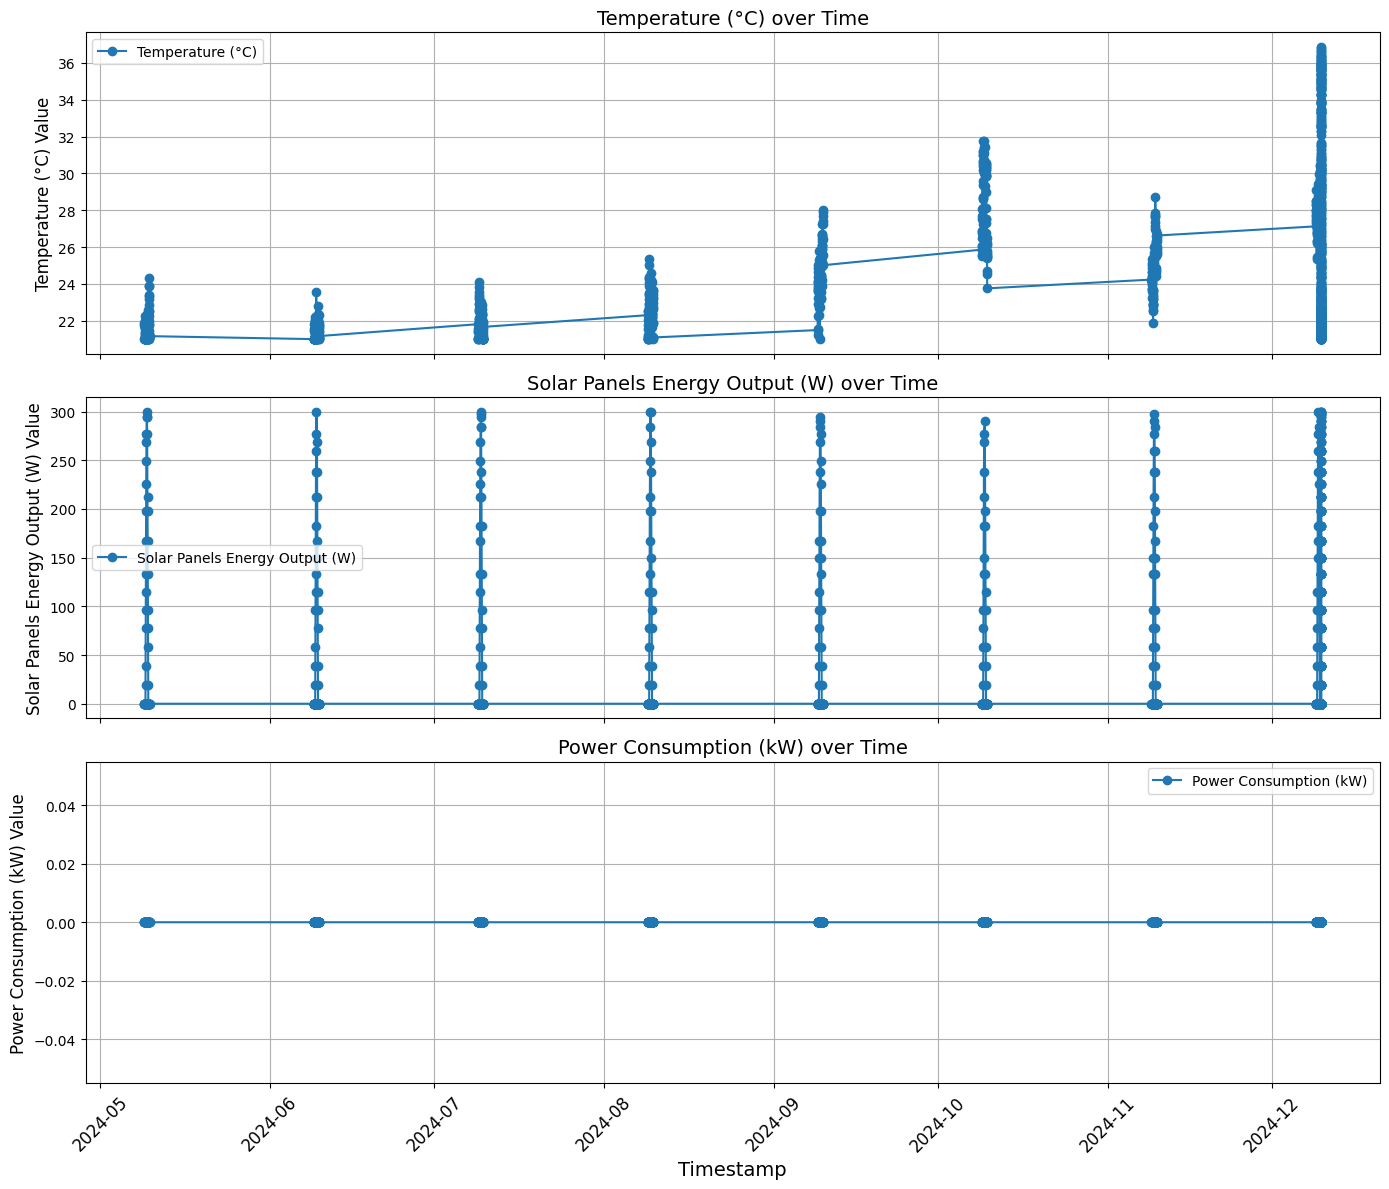

In [73]:
# Select relevant numeric columns that make sense for visualization
selected_columns = ['Temperature (°C)', 'Solar Panels Energy Output (W)', 
                    'Power Consumption (kW)']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(14, 12), sharex=True)

# Plot each selected column in a separate subplot
for i, col in enumerate(selected_columns):
    axes[i].plot(data['Timestamp'], data[col], marker='o', label=col, color='tab:blue')
    axes[i].set_title(f'{col} over Time', fontsize=14)
    axes[i].set_ylabel(f'{col} Value', fontsize=12)
    axes[i].grid(True)
    axes[i].legend(loc='best')

# Customize the x-axis for all subplots
plt.xlabel('Timestamp', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()